# Part 2 of Machine Learning 

#### Predicting number of People with Internet Access for the next 5 years for each region

using 2 independent variables, 1 dependent variable and regression algorithms


In [116]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
#suppres warnings
import warnings
warnings.filterwarnings('ignore')

In [117]:
#Loading our clean data from Step 5
df_pr = pd.read_csv("FINAL.csv")
df_pr.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0


In [118]:
#creating set with unique region names
unique_region_names = set(df_pr['Region'])
#creating set with years needed to be predicted
years_to_predict = np.array([2023, 2024, 2025, 2026, 2027])

In [119]:
#loading regressions
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
model_list = [linear,ridge,lasso]

In [120]:
#Splitting data
data=[]
for region in unique_region_names:
    
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year','Estimated Population nr']]
    y = df_pred['Nr of Persons with Internet Access']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
#train models from created list
    for model in model_list:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])

#taking model with best score for each region
data = []
for region in unique_region_names:
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_df3 = pd.DataFrame(data, columns = ['Region','Score','Model'])

In [121]:
pred_df3

,Region,Score,Model
0,Mid-West,0.796682,LinearRegression()
1,Dublin,0.998062,Lasso()
2,South-West,0.896263,Ridge()
3,West,0.244942,Lasso()
4,Border,0.900159,LinearRegression()
5,South-East,0.937257,Ridge()
6,Mid-East,0.932612,Ridge()
7,Midlands,0.996824,LinearRegression()
8,Ireland,0.971619,Ridge()


# Hyperparameter tuning for region 'West'

In [122]:
region_name = ['West']

In [123]:
# Applying GridSearchCV for Lasso Regression and taking best parameters
data = []
for region in region_name:    
    df_GS = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
    X = df_pred[['Year','Estimated Population nr']]
    y = df_pred['Nr of Persons with Internet Access']   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    clf = GridSearchCV(lasso, {
        'alpha': [10,100,1000,10000,1000000]
    }, cv=4, return_train_score=False)
    clf.fit(X, y)
    best_params = clf.best_params_
    best_score = clf.best_score_
    row = [region,best_params, best_score]
    data.append(row)    
    df_GSr = pd.DataFrame(data, columns = ['Region','best_params','Score'])
df_GSr

,Region,best_params,Score
0,West,{'alpha': 10000},0.83561


In [124]:
lasso100 = Lasso(alpha = 1000000)
model_list = [lasso100]

In [125]:
data=[]

for region in region_name:
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year','Estimated Population nr']]
    y = df_pred['Nr of Persons with Internet Access']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    for model in model_list:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])
data = []
for region in region_name:
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_df4 = pd.DataFrame(data, columns = ['Region','Score','Model'])
pred_df4.Score.mean()

0.30642434337322877

##### Score improved from 0.244942 to 0.306424	

In [126]:
pred_df4

,Region,Score,Model
0,West,0.306424,Lasso(alpha=1000000)


# Prediction part

In [127]:
#load data from previous step: Predicting Estimated Population
dfe = pd.read_csv("dfe.csv")
dfe.describe()

,Year,Predicted Estimated Population nr
count,45.000000,4.500000e+01
mean,2025.000000,2.348936e+06
std,1.430194,3.021037e+06
min,2023.000000,6.407404e+05
25%,2024.000000,9.239048e+05
50%,2025.000000,1.024233e+06
75%,2026.000000,1.612315e+06
max,2027.000000,1.079840e+07


In [128]:
dfe.head()

,Year,Region,Predicted Estimated Population nr
0,2023,South-West,1483545.23
1,2024,South-West,1497658.74
2,2025,South-West,1511772.24
3,2026,South-West,1525885.75
4,2027,South-West,1539999.26


## using according model to predict values for each region

In [129]:
#List of regions with their best model
pred_df3

,Region,Score,Model
0,Mid-West,0.796682,LinearRegression()
1,Dublin,0.998062,Lasso()
2,South-West,0.896263,Ridge()
3,West,0.244942,Lasso()
4,Border,0.900159,LinearRegression()
5,South-East,0.937257,Ridge()
6,Mid-East,0.932612,Ridge()
7,Midlands,0.996824,LinearRegression()
8,Ireland,0.971619,Ridge()


In [130]:
# model with adjusted parameters for West region
pred_df4

,Region,Score,Model
0,West,0.306424,Lasso(alpha=1000000)


## predicting Nr of people with Internet Access for Dublin for next 5 years

In [131]:
df_pr.describe()

,Year,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
count,108.000000,1.080000e+02,1.080000e+02,108.000000
mean,2016.500000,2.140712e+06,1.866451e+06,86.027778
std,3.468146,2.729605e+06,2.400130e+06,5.897819
min,2011.000000,5.676000e+05,4.248340e+05,66.000000
25%,2013.750000,8.333750e+05,6.981822e+05,82.000000
50%,2016.500000,9.668000e+05,8.586830e+05,87.000000
75%,2019.250000,1.488175e+06,1.387739e+06,90.062500
max,2022.000000,1.036790e+07,9.745826e+06,97.000000


In [132]:
years_to_predict

array([2023, 2024, 2025, 2026, 2027])

In [133]:
#For Dublin using lasso with default parameters
data=[]
region = 'Dublin'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
lasso.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = lasso.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

df_final = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])

## doing same prediction for rest of regions

In [134]:
#For Ireland using ridge with default parameters
data=[]
region = 'Ireland'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

pred_ireland = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_ireland],ignore_index=True)

#For Mid-East using ridge with default parameters
data=[]
region = 'Mid-East'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
    
pred_mid_east = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_mid_east],ignore_index=True) 


#For South-East using ridge with default parameters
data=[]
region = 'South-East'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_south_east = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_south_east],ignore_index=True)
    
#For South-West using ridge with default parameters    
data=[]
region = 'South-West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_south_west = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_south_west],ignore_index=True)
    
#For Mid-West using linear regression
data=[]
region = 'Mid-West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
linear.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = linear.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_mid_west = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_mid_west],ignore_index=True)
    
#For Midlands using linear regression      
data=[]
region = 'Midlands'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
linear.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = linear.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_midlands = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_midlands],ignore_index=True)
    
#For Border using linear regression      
data=[]
region = 'Border'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
linear.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = linear.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_border = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_border],ignore_index=True)

#For West using ridge with adjusted alfa = 1000000     
data=[]
region = 'West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
lasso100.fit(X_train, y_train)
for year in years_to_predict:
    p = lasso100.predict([[year,e_population]])
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_west = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_west],ignore_index=True)

In [135]:
df_final.head()

,Year,Region,Predicted Nr of Persons with Internet Access
0,2023,Dublin,2897494.35
1,2024,Dublin,2963599.76
2,2025,Dublin,3029705.16
3,2026,Dublin,3095810.56
4,2027,Dublin,3161915.97


In [137]:
#Checking final data frame to have exact 5 years*9 regions=45 rows
df_final.describe()

,Year,Predicted Nr of Persons with Internet Access
count,45.000000,4.500000e+01
mean,2025.000000,2.296941e+06
std,1.430194,2.975547e+06
min,2023.000000,6.093294e+05
25%,2024.000000,8.838055e+05
50%,2025.000000,9.914065e+05
75%,2026.000000,1.567357e+06
max,2027.000000,1.084817e+07


In [145]:
#loading data into a csv file to use data in other part of project

df_final.to_csv("dfp.csv", index = False)

# Visualizing historical and predicted data

In [139]:
df_finalc = df_final.rename(columns={'Predicted Nr of Persons with Internet Access': 'Nr of Persons with Internet Access'})

In [140]:
df_finala = pd.DataFrame(df_pr, columns=['Year','Region','Nr of Persons with Internet Access'])

In [141]:
df = pd.concat([df_finala, df_finalc], ignore_index=True)
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df = df.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df = df.reset_index(drop=True)

In [142]:
df

,Year,Region,Nr of Persons with Internet Access
0,2011,Border,517440.00
1,2011,Dublin,2119320.00
2,2011,Ireland,7136766.00
3,2011,Mid-East,1143963.00
4,2011,Mid-West,718872.00
...,...,...,...
148,2027,South-West,1549154.34
149,2027,Border,885204.18
150,2027,South-East,954063.22
151,2027,Mid-East,1597286.03


In [143]:
df_reg = df[df["Region"] != "Ireland"]
df_reg.Region.unique()

array(['Border', 'Dublin', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

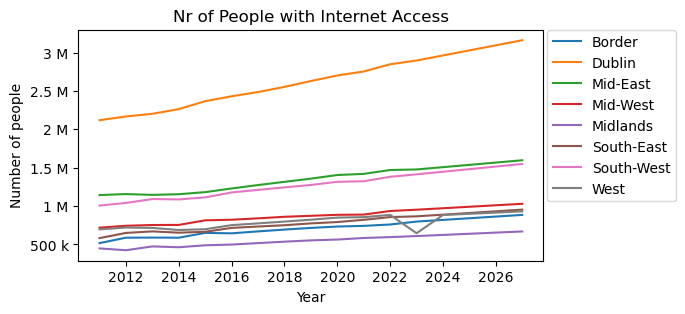

In [144]:
#Plotting dynamic of population growrh in time
plt.figure(figsize=(6, 3)) # setting figure size
for region in df_reg.Region.unique(): # creating a loop for regions
    df_region = df_reg[df_reg['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter()) # set ticker for big numbers
    plt.plot(df_region['Year'], df_region['Nr of Persons with Internet Access'], label=region) # creating a plot with data for axes
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03)) # setting legend outfide of figure with plot for readability
    # Set title and axes name
    plt.title('Nr of People with Internet Access') 
    plt.xlabel("Year")
    plt.ylabel("Number of people")